# **LSTM** main

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error
import torch
import pytorch_lightning as pl
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss, MAE

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_forecasting\models\base\_base_model.py:28: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
df = pd.read_csv('data/BTC-USD_training_data_data.csv',index_col='Date',parse_dates=['Date'])
df = df.sort_index()  
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [3]:
def plot_pred(test,pred):
    plt.plot(test, color='r',label='Actual Bitcoin price')
    plt.plot(pred, color='b',label='predicted Bitcoin price')
    plt.title('pedicted Bitcoin price')
    plt.xlabel('time')
    plt.ylabel('Bitcoin price')
    plt.legend()
    plt.show()
    
def return_rmse(test,pred):
    rmse = math.sqrt(mean_squared_error(test,pred))
    print('Root MSE = {}.'.format(rmse))

In [4]:
train_set = df[:'2020'].iloc[:,1:2].values
test_set = df['2021':].iloc[:,1:2].values

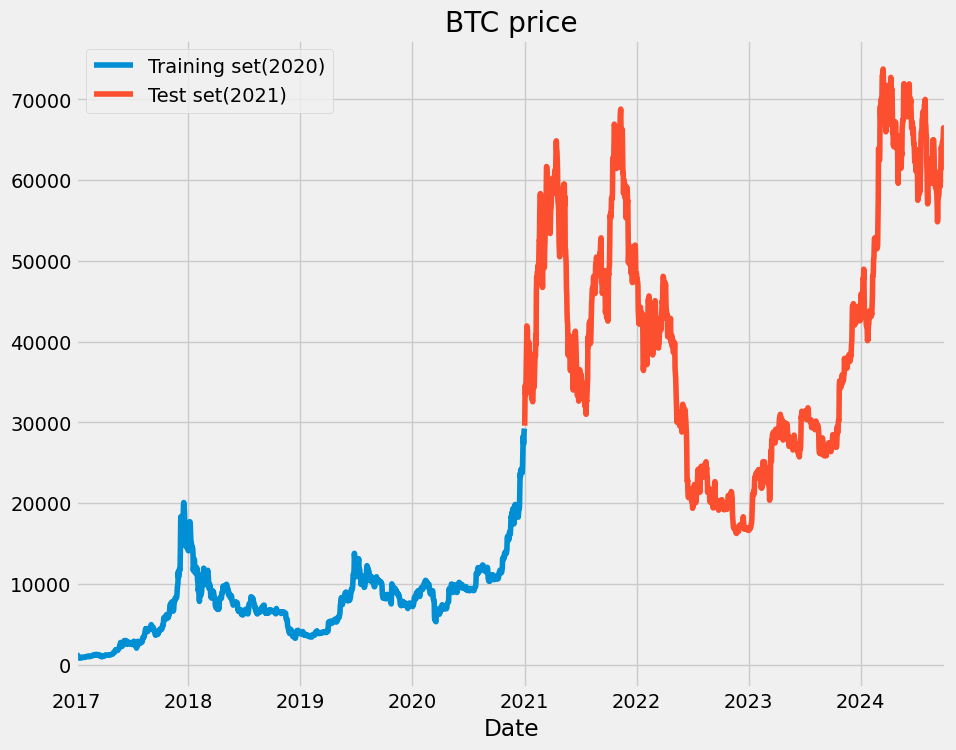

In [5]:
df['High'][:'2020'].plot(figsize=(10,8),legend=True)
df['High']['2021':].plot(figsize=(10,8),legend=True)
plt.legend(['Training set(2020)','Test set(2021)'])
plt.title('BTC price')
plt.show()

In [6]:
sc = MinMaxScaler(feature_range=(0,1))
train_set_sc = sc.fit_transform(train_set)

In [7]:
train_set_sc.shape

(1461, 1)

In [8]:
x_train = []
y_train = []
for i in range(60,1461):
    x_train.append(train_set_sc[i-60:i,0])
    y_train.append(train_set_sc[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [10]:
# LSTM
model_lstm = Sequential()

#1
model_lstm.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model_lstm.add(Dropout(0.2))

#2
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.2))

#3
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.2))

#4
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))

#Output
model_lstm.add(Dense(units=1))

#Compile RNN
model_lstm.compile(optimizer='rmsprop',loss='mean_squared_error')

#Fit training set
model_lstm.fit(x_train,y_train,epochs=20,batch_size=32)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - loss: 0.0103
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0055
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0046
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0038
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0035
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0031
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0026
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0029
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0027
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0024
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0023
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0022
Epoch 13/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0024
Epoch 14/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0020
Epoch 15/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0021
Epoc

In [11]:
df_total = pd.concat((df['High'][:'2020'],df['High']['2021':]),axis=0)
inputs = df_total[len(df_total)-len(test_set)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(1435, 1)

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


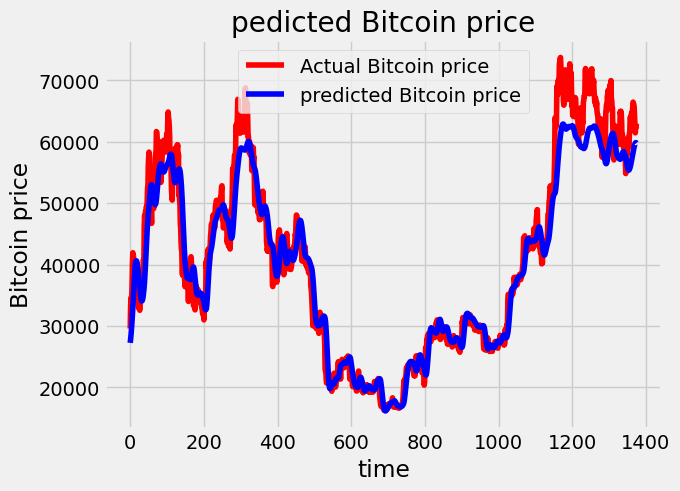

In [12]:
x_test=[]
for i in range(60,1435):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_harga = model_lstm.predict(x_test)
pred_harga = sc.inverse_transform(pred_harga)
plot_pred(test_set,pred_harga)

In [13]:
return_rmse(test_set,pred_harga)

Root MSE = 3892.0535522747728.


In [14]:
model_lstm.save('models/model.h5')